# Project : Credit Card Fraud Detection

##### About Dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Data Source : Kaggle

Tools : Jupyter Notebook

OBJECT:
Here we mainly focus on credit card fraud transactions in realworld. Initially we will collect the credit card dataset and then the dataset will be analysed and processed


In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Load the dataset into  Pandas dataframe

In [2]:
data=pd.read_csv("C:\\Users\\INDU\\Desktop\\CC1.csv")

In [3]:
pd.options.display.max_columns = None

# Display first five rows of the dataset.

In [4]:

data.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,NaN,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Display last five rows of the dataset.

In [5]:
data.tail()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,284803,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,284804,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,284805,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,284806,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,284807,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
#removing the column Unnamed: 0 because it is not needed
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,NaN,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Finding Shape of our DataSet

In [7]:
data.shape

(284807, 31)

In [8]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 284807
Number of Columns 31


# Get information about our Dataset like Total Number Rows,Total Number of Columns, Datatypes of Each Column and Memory Requirement

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284806 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284804 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284805 non-null  float64
 6   V6      284805 non-null  float64
 7   V7      284804 non-null  float64
 8   V8      284804 non-null  float64
 9   V9      284804 non-null  float64
 10  V10     284802 non-null  float64
 11  V11     284806 non-null  float64
 12  V12     284806 non-null  float64
 13  V13     284806 non-null  float64
 14  V14     284803 non-null  float64
 15  V15     284806 non-null  float64
 16  V16     284800 non-null  float64
 17  V17     284804 non-null  float64
 18  V18     284803 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Check Null Values in the Dataset

In [10]:
data.isnull().sum()

Time      0
V1        1
V2        0
V3        3
V4        0
V5        2
V6        2
V7        3
V8        3
V9        3
V10       5
V11       1
V12       1
V13       1
V14       4
V15       1
V16       7
V17       3
V18       4
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
# Fill null value by the Ffill methot
data.V1.fillna(method='ffill', inplace=True)
data.V3.fillna(method='ffill', inplace=True)
data.V5.fillna(method='ffill', inplace=True)
data.V6.fillna(method='ffill', inplace=True)
data.V7.fillna(method='ffill', inplace=True)
data.V8.fillna(method='ffill', inplace=True)
data.V9.fillna(method='ffill', inplace=True)
data.V11.fillna(method='ffill', inplace=True)
data.V10.fillna(method='ffill', inplace=True)
data.V12.fillna(method='ffill', inplace=True)
data.V13.fillna(method='ffill', inplace=True)
data.V14.fillna(method='ffill', inplace=True)
data.V15.fillna(method='ffill', inplace=True)
data.V16.fillna(method='ffill', inplace=True)
data.V17.fillna(method='ffill', inplace=True)
data.V18.fillna(method='ffill', inplace=True)

In [12]:
# Now Again Cheking missing values in columns
data_missing_values = data.isnull().sum()
data_missing_values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,1.247203,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()
data["Amount"]=sc.fit_transform(pd.DataFrame(data['Amount']))

In [16]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,1.247203,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [17]:
data = data.drop(["Time"],axis=1)

In [18]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,1.247203,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [19]:
data.shape

(284807, 30)

In [20]:
data.duplicated().any()

True

In [21]:
data = data.drop_duplicates()

In [22]:
data.shape

(275663, 30)

In [23]:
284807-275663

9144

# Not Handling Imbalanced

In [24]:
data["Class"].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [25]:
import seaborn as sns

<AxesSubplot:xlabel='Class', ylabel='count'>

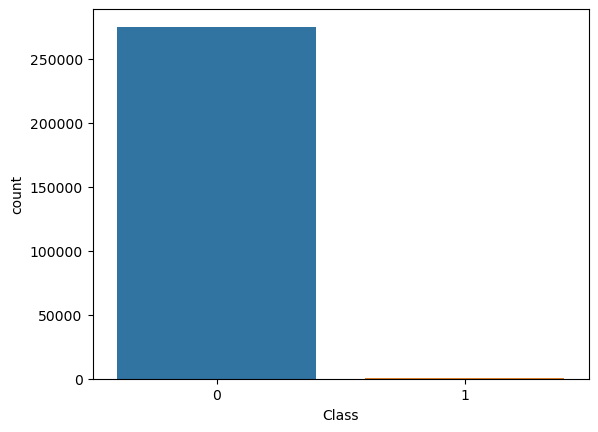

In [26]:
sns.countplot(data["Class"])

# Store Feature Matrix in X and Response(Target) in Vector y

In [27]:
x = data.drop("Class",axis=1)
y = data["Class"]

# Splitting the Dataset into the Training Set and Test Set

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,
                                                random_state=42)

# Handling imbalanced Dataset

In [29]:
#under sampling
#oversampling


# Undersampling

In [30]:
normal = data[data["Class"]==0]
fraud = data[data["Class"]==1]

In [31]:
normal.shape


(275190, 30)

In [32]:
fraud.shape

(473, 30)

In [33]:
normal_sample=normal.sample(n=473)

In [34]:
normal_sample.shape

(473, 30)

In [35]:
new_data = pd.concat([normal_sample,fraud])

In [36]:
new_data["Class"].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [37]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
80277,1.216248,0.217858,-0.185325,0.771201,0.106515,0.003741,-0.162653,0.071036,0.308806,-0.619671,0.665524,0.887186,0.395834,-1.518667,-0.931024,0.517252,0.555034,0.737507,0.580231,-0.003541,-0.177230,-0.274791,-0.216183,-0.543854,0.644877,0.443618,-0.000127,0.025547,-0.304013,0
100540,-0.284120,0.354570,1.124570,-0.622302,1.193664,0.633452,0.561704,-0.012181,0.052078,-0.446047,-0.624214,0.687413,0.829524,-0.627438,-1.638303,0.384824,-1.180712,0.449180,0.578676,0.068473,-0.114565,-0.016268,-0.486277,-1.319060,0.450135,0.348575,-0.190229,-0.249335,-0.349271,0
78039,-1.050056,1.056519,0.836628,0.177170,-0.257871,-1.133516,0.285015,0.357911,-0.354760,-0.597594,-0.486161,-0.357220,-0.621421,0.006088,0.973169,0.548273,0.207040,0.003644,-0.063748,-0.103877,-0.234956,-0.742825,0.318721,0.305639,-0.109857,0.075425,0.022826,-0.001404,-0.281304,0
3690,1.351409,-0.779680,0.501482,-1.063961,-0.664493,0.741858,-1.180010,0.261391,-0.663686,0.714377,0.650026,0.041444,0.952387,-0.398294,0.692648,1.698675,-0.370425,-0.491372,0.586679,0.162242,0.396436,1.108809,-0.245164,-1.090394,0.494196,0.032635,0.050361,0.003301,-0.265271,0
170221,2.169498,-1.081440,-1.003399,-1.192692,-0.452339,0.346489,-1.063000,0.063144,-0.115059,0.879521,-0.214382,0.065356,0.912929,-0.469898,-0.439189,1.663961,-0.588055,-0.360771,1.169256,0.091756,0.308375,0.941014,-0.064230,-1.391493,-0.000770,-0.020774,0.007895,-0.067864,-0.223811,0


In [38]:
x = new_data.drop("Class",axis=1)
y = new_data["Class"]

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,
                                                random_state=42)

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_pred1 = log.predict(x_test)


In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test,y_pred1)

0.9526315789473684

In [44]:
from sklearn.metrics import precision_score,recall_score,f1_score


In [45]:
precision_score(y_test,y_pred1)

1.0

In [46]:
recall_score(y_test,y_pred1)

0.9117647058823529

In [47]:
f1_score(y_test,y_pred1)

0.9538461538461539

# Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
y_pred2 = dt.predict(x_test)

In [50]:
accuracy_score(y_test,y_pred2)

0.8947368421052632

In [51]:
precision_score(y_test,y_pred2)

0.91

In [52]:
recall_score(y_test,y_pred2)

0.8921568627450981

In [53]:
f1_score(y_test,y_pred2)

0.900990099009901

# Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
y_pred3 = rf.predict(x_test)

In [56]:
accuracy_score(y_test,y_pred3)

0.9368421052631579

In [57]:
precision_score(y_test,y_pred3)

0.9891304347826086

In [58]:
recall_score(y_test,y_pred3)

0.8921568627450981

In [59]:
f1_score(y_test,y_pred3)

0.9381443298969072

In [60]:
final_data = pd.DataFrame({"Models":["LR","DT","RF"],
                          "ACC":[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred1)*100
                                ]})

In [61]:
final_data

,Models,ACC
0,LR,95.263158
1,DT,95.263158
2,RF,95.263158


<AxesSubplot:xlabel='Models', ylabel='ACC'>

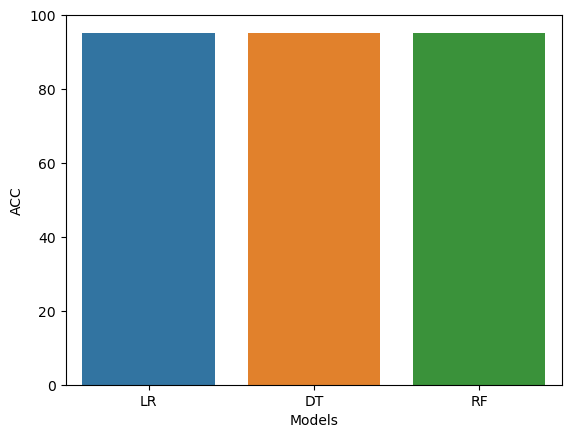

In [62]:
sns.barplot(final_data["Models"],final_data["ACC"])

# OverSampling

In [63]:
X = data.drop("Class",axis=1)
y = data["Class"]

In [64]:
X.shape

(275663, 29)

In [65]:
y.shape

(275663,)

In [66]:
!pip install imblearn


In [67]:
from imblearn.over_sampling import SMOTE

In [68]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [69]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

#### Logistic Regression

In [71]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [72]:
y_pred1 = log.predict(X_test)

In [73]:
accuracy_score(y_test,y_pred1)

0.9444474726552564

In [74]:
precision_score(y_test,y_pred1)

0.9731890510666306

In [75]:
recall_score(y_test,y_pred1)

0.9140046906532371

In [76]:
f1_score(y_test,y_pred1)

0.9426688292815556

#### Decision Tree Classifier

In [77]:
Dt=DecisionTreeClassifier()
Dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [78]:
y_pred2 = Dt.predict(X_test)

In [79]:
accuracy_score(y_test,y_pred2)

0.9981739888804099

In [80]:
precision_score(y_test,y_pred2)

0.9974222125403914

In [81]:
recall_score(y_test,y_pred2)

0.998927331236478

In [82]:
f1_score(y_test,y_pred2)

0.9981742045072624

#### Random Forest Classifier

In [85]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [86]:
y_pred3 = rf.predict(X_test)

In [87]:
accuracy_score(y_test,y_pred3)

0.999918238308078

In [89]:
precision_score(y_test,y_pred3)

0.9998363993310551

In [88]:
recall_score(y_test,y_pred3)

1.0

In [90]:
f1_score(y_test,y_pred3)

0.9999181929736854

In [91]:
final_data = pd.DataFrame({"Models":["LR","DT","RF"],
                          "ACC":[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred1)*100
                                ]})

In [92]:
final_data

,Models,ACC
0,LR,94.444747
1,DT,94.444747
2,RF,94.444747


<AxesSubplot:xlabel='Models', ylabel='ACC'>

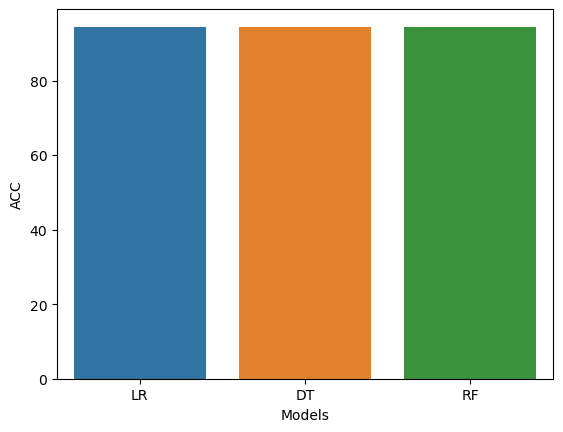

In [93]:
sns.barplot(final_data["Models"],final_data["ACC"])

# Save the Model

In [94]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [95]:
import joblib

In [96]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [97]:
model = joblib.load("credit_card_model")

In [102]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [103]:
if pred == 0:
    print("Normal Transaction")
else:
    print("Fradulent")

Normal Transaction
